<a href="https://colab.research.google.com/github/Sheikh-JamirAlam/Handwriting_Prediction_Using_CNN/blob/main/Handwriting_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(r'/content/gdrive/MyDrive/Test MNIST Model/train.csv')
X = df.drop(['label'], axis=1)
y = df.label
X.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


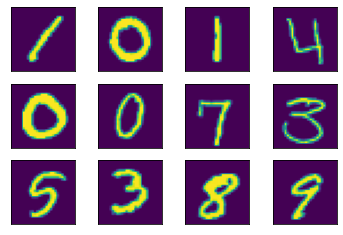

In [ ]:
fig, ax = plt.subplots(3,4)
for i, axis in enumerate(ax.flat):
    axis.imshow(X.iloc[i].values.reshape((28,28)))
    axis.xaxis.set_visible(False)
    axis.yaxis.set_visible(False)
plt.show()

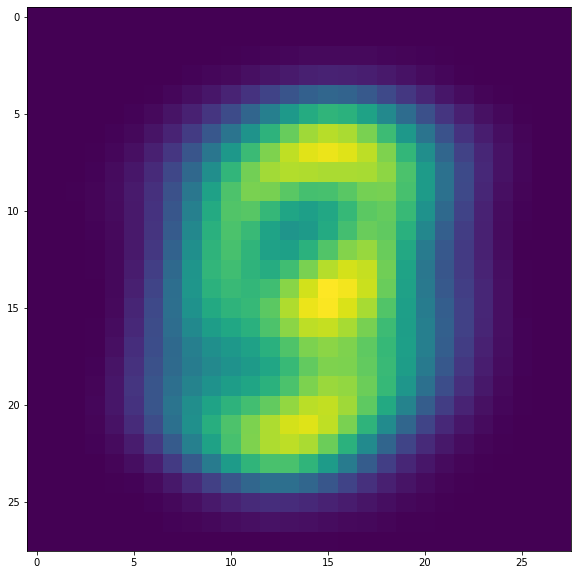

In [ ]:
avgs = X.mean()
plt.figure(figsize=(10,10))
plt.imshow(avgs.values.reshape((28,28)))

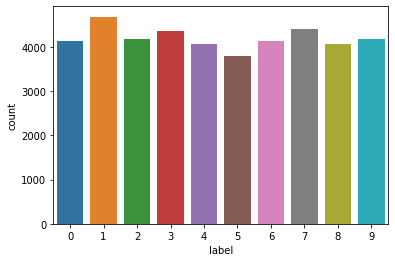

In [ ]:
sns.countplot(x='label', data=df)

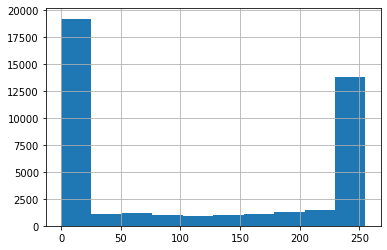

In [ ]:
X.pixel378.hist()

In [ ]:
def mnist_val(model):
    scores = cross_val_score(model, X, y, cv=5)
    print("Cross Validation score: ", scores.mean())
    
    #confusion matrix
def mnist_cm(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mat = confusion_matrix(y_test, preds)
    plt.figure(figsize=(10,10))
    sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d',
               xticklabels=[0,1,2,3,4,5,6,7,8,9],
               yticklabels=[0,1,2,3,4,5,6,7,8,9])
    plt.show()

In [ ]:
dt = DecisionTreeClassifier(ccp_alpha=0.01)

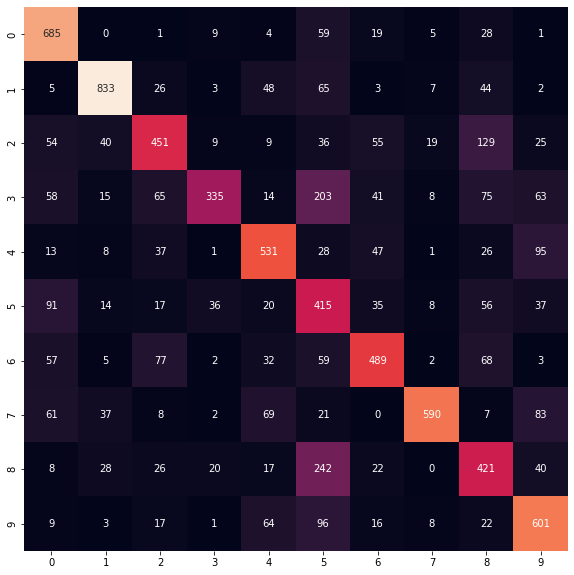

In [ ]:
mnist_cm(dt)

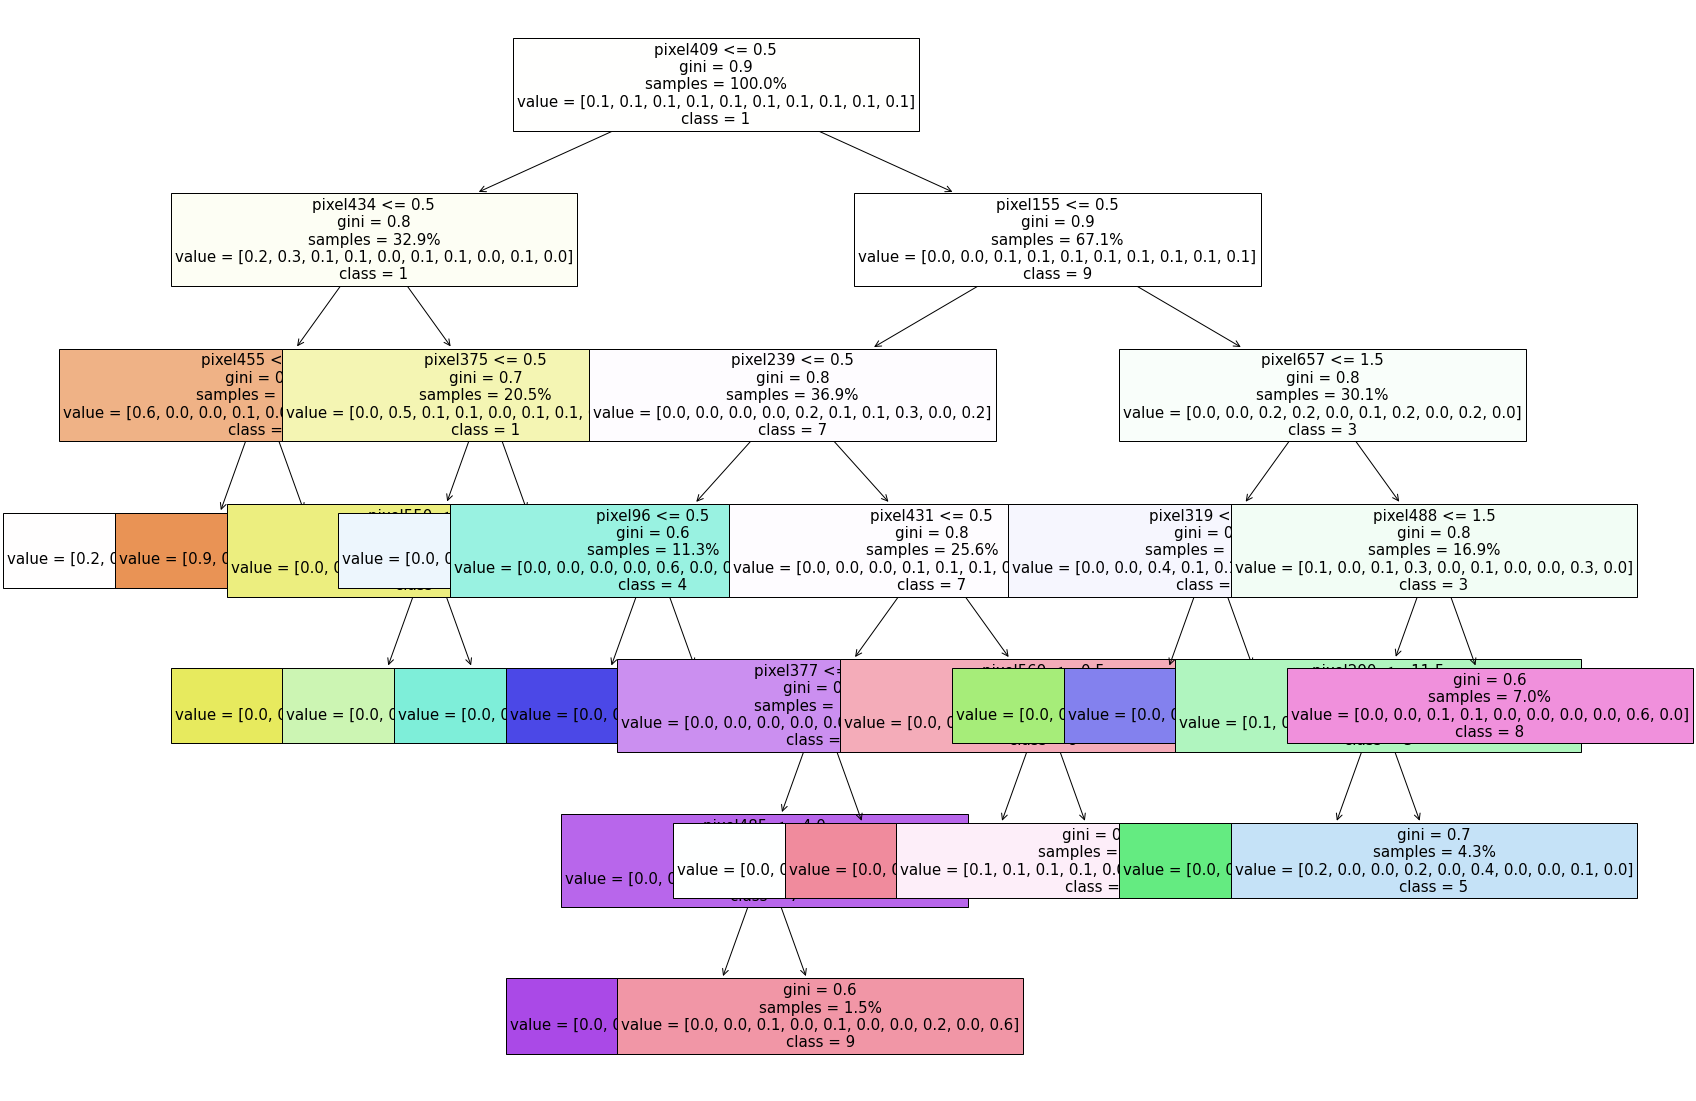

In [ ]:
plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, filled=True,
                   feature_names=X.columns,
                   class_names=['0','1','2','3','4','5','6','7','8','9'],
                  proportion=True,
                  precision=1,
                  fontsize=15)
plt.show()

In [ ]:
mnist_val(dt)

Cross Validation score:  0.6436904761904761


In [ ]:
nb = BernoulliNB()

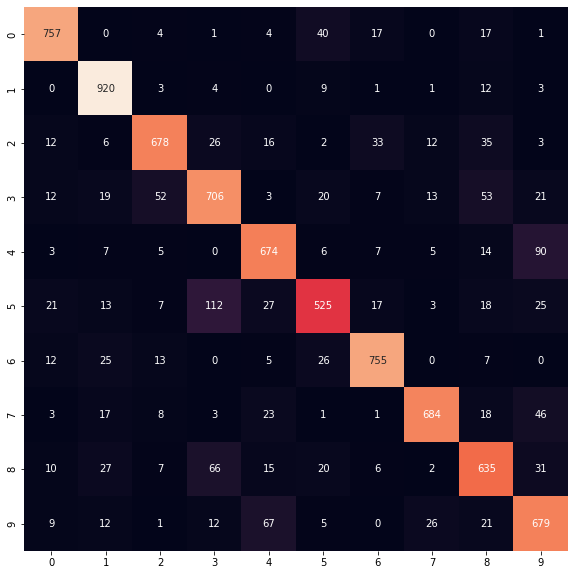

In [ ]:
mnist_cm(nb)

In [ ]:
mnist_val(nb)

Cross Validation score:  0.8332142857142857


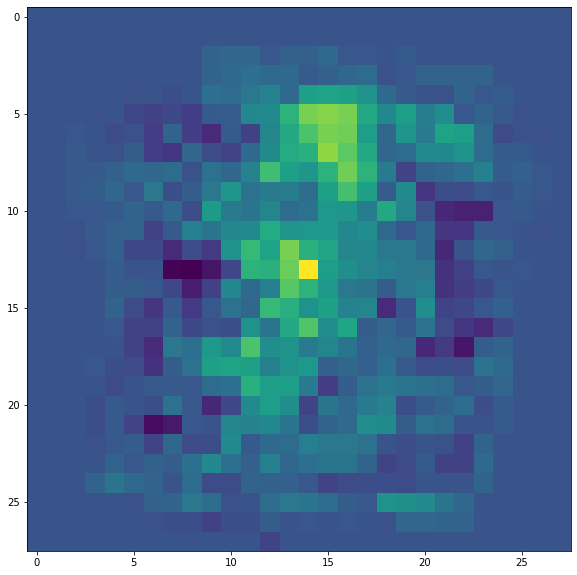

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean
plt.figure(figsize=(10,10))
plt.imshow(importances.reshape((28,28)))

In [ ]:
# Down sample for speed of SVM and kNN algos
tempX = X.copy()
tempY = y.copy()
X = X/255
X = X.iloc[::10]
y = y.iloc[::10]

In [ ]:
for kern in ['linear','poly','rbf','sigmoid']:
    sm = svm.SVC(kernel=kern, C=10000, cache_size=700, gamma=0.001)
    print('Accuracy for ', kern)
    mnist_val(sm)

Accuracy for  linear
Cross Validation score:  0.900952380952381
Accuracy for  poly
Cross Validation score:  0.9280952380952382
Accuracy for  rbf
Cross Validation score:  0.9195238095238096
Accuracy for  sigmoid
Cross Validation score:  0.8995238095238095


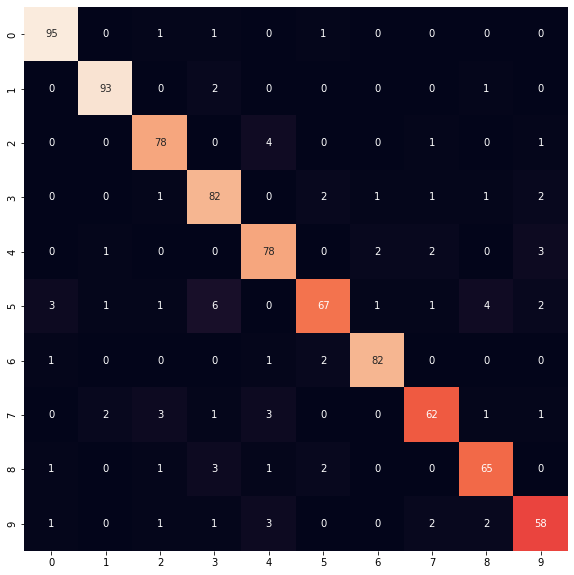

In [ ]:
lsvm = svm.SVC(kernel='linear', C=0.1)
mnist_cm(lsvm)

In [ ]:
mnist_val(lsvm)

Cross Validation score:  0.9126190476190477


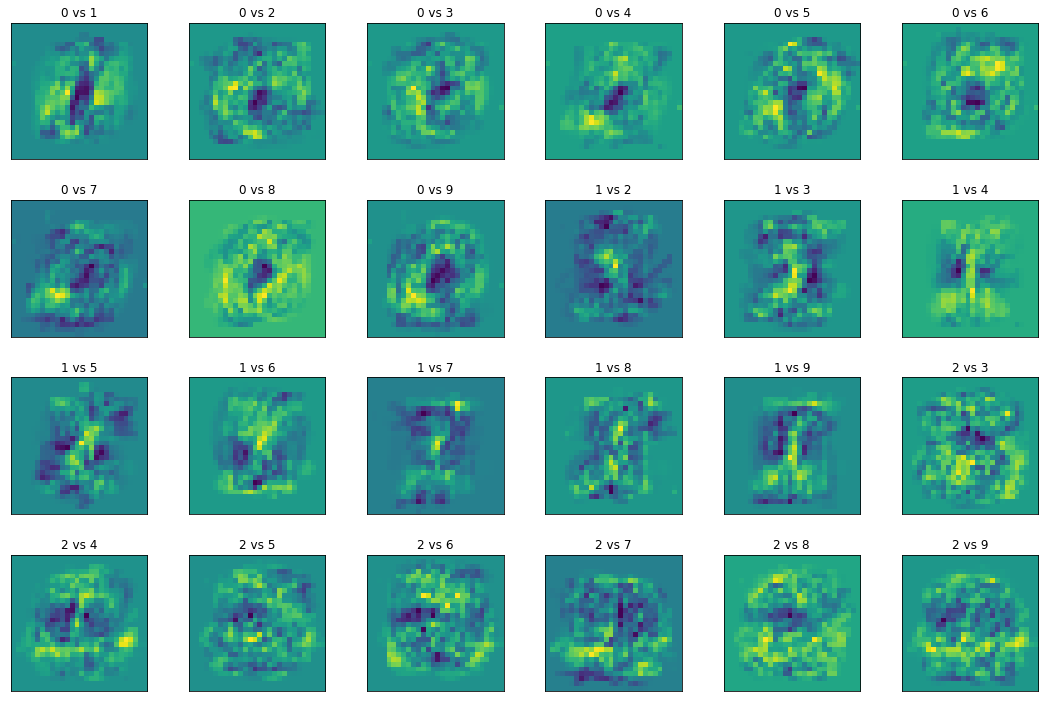

In [ ]:
fig, ax = plt.subplots(4,6,figsize=(15,10))
fig.tight_layout()
for i, axis in enumerate(ax.flat):
    
    axis.imshow(lsvm.coef_[i].reshape((28,28)))
    axis.xaxis.set_visible(False)
    axis.yaxis.set_visible(False)
    if i < 9:
        axis.set_title("0 vs " + str(i+1))
    elif i < 17:
        axis.set_title("1 vs " + str(i-7))
    else:
        axis.set_title("2 vs " + str(i-14))
plt.show()

Cross Validation score:  0.9180952380952381


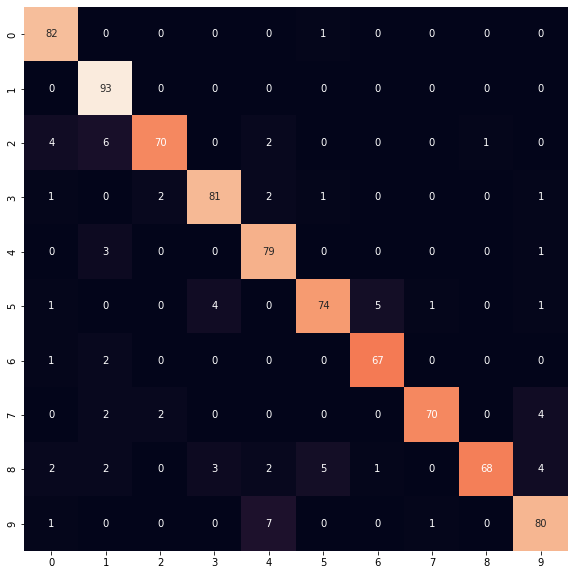

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
mnist_val(knn)
mnist_cm(knn)

In [ ]:
preds = knn.predict(X)

In [ ]:
res_df = X.copy()
res_df['label'] = preds

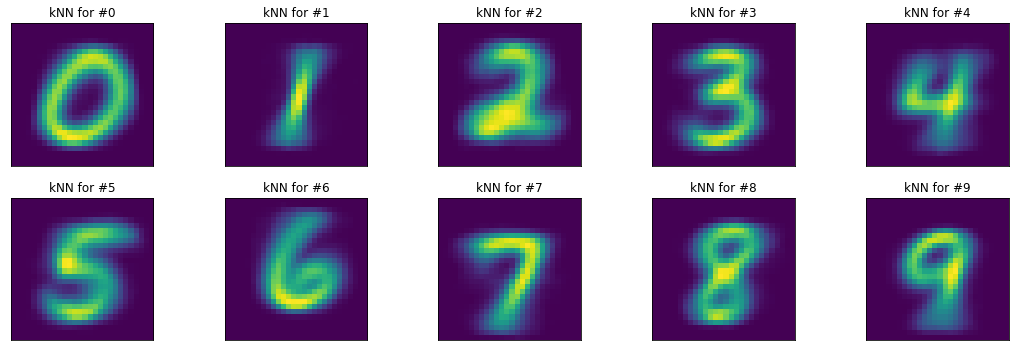

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(15,5))
fig.tight_layout()
for i, axis in enumerate(ax.flat):
    arr = res_df[res_df.label == i]
    axis.imshow(arr.drop(['label'], axis=1).mean().values.reshape((28,28)))
    axis.xaxis.set_visible(False)
    axis.yaxis.set_visible(False)
    axis.set_title("kNN for #" + str(i))
plt.show()

In [ ]:
#Returning to full dataset
#X = tempX
#y = tempY

Cross Validation score:  0.9297619047619048


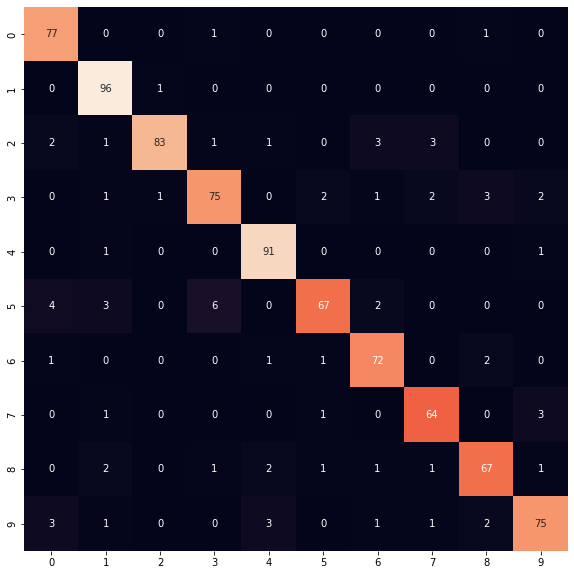

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
mnist_val(rf)
mnist_cm(rf)

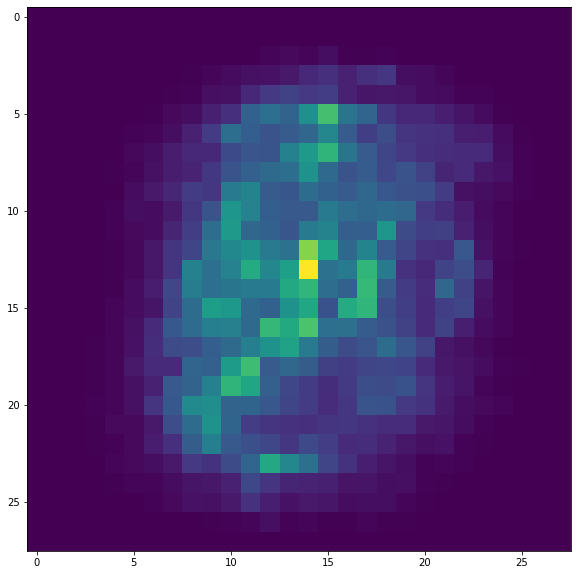

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(rf.feature_importances_.reshape((28,28)))